In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from s3fs import S3FileSystem, S3Map

import cmocean as cm

In [28]:
%matplotlib notebook

In [29]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='large'
plt.rcParams['pcolor.shading']='auto'

In [30]:
# Login to the s3 bucket and list soop folders
# http://imos-data.s3-website-ap-southeast-2.amazonaws.com/?prefix=IMOS/SOOP/SOOP-SST/
fs = S3FileSystem(anon=True)
aodn = fs.ls('imos-data/IMOS/ANFOG/REALTIME/slocum_glider/')
for item in aodn:
    print(item)

imos-data/IMOS/ANFOG/REALTIME/slocum_glider/BassStrait20230518
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/Forster20230217
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/MissionBeach20230203
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/MurrayPlume20230225
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef120230424
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef220230424
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/Sydney20230301
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/TasWestCoast20230405
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/TwoRocks20220916
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/Yamba20221123


In [31]:
def open_file_nocache(fname, myfs):
    """
    Load a netcdf file directly from an S3 bucket
    """
    fileobj = myfs.open(fname)
    return xr.open_dataset(fileobj)


In [39]:
aodn = fs.glob('imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/')
for item in aodn:
    print(item)



imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/IMOS_ANFOG_BCEOSTUV_20230425T225910Z_SL248_FV00_timeseries_END-20230520T015856Z.nc
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230424T000000-20230426T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230426T000000-20230428T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230428T000000-20230430T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230430T000000-20230502T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230502T000000-20230504T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230504T000000-20230506T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/unit248_b700_tser_20230506T000000-20230508T000000.png
imos-data/IMOS/ANFOG/REALTIME/slocu

In [40]:
ncfile = aodn[0]
print(ncfile)
ds = open_file_nocache(ncfile, fs)
ds

imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/IMOS_ANFOG_BCEOSTUV_20230425T225910Z_SL248_FV00_timeseries_END-20230520T015856Z.nc


<xarray.Dataset>
Dimensions:                    (TIME: 42253)
Coordinates:
  * TIME                       (TIME) datetime64[ns] 2023-04-25T22:59:10.9603...
    LATITUDE                   (TIME) float64 ...
    LONGITUDE                  (TIME) float64 ...
    DEPTH                      (TIME) float64 ...
Data variables: (12/36)
    PLATFORM                   |S1 ...
    DEPLOYMENT                 |S1 ...
    SENSOR1                    |S1 ...
    SENSOR2                    |S1 ...
    SENSOR3                    |S1 ...
    SENSOR4                    |S1 ...
    ...                         ...
    IRRAD490                   (TIME) float64 ...
    IRRAD490_quality_control   (TIME) float32 ...
    IRRAD555                   (TIME) float64 ...
    IRRAD555_quality_control   (TIME) float32 ...
    IRRAD670                   (TIME) float64 ...
    IRRAD670_quality_control   (TIME) float32 ...
Attributes: (12/43)
    project:                       Integrated Marine Observing System (IMOS)
    institution:                   ANFOG (Australian National Facility for Oc...
    references:                    http://www.imos.org.au; "ANFOG Data Manage...
    naming_authority:              IMOS
    cdm_data_type:                 Trajectory
    data_centre:                   Australian Ocean Data Network (AODN)
    ...                            ...
    geospatial_lon_max:            123.0552
    geospatial_lat_min:            -14.4558
    geospatial_lat_max:            -14.1129
    time_coverage_start:           2023-04-25T22:59:10Z
    time_coverage_end:             2023-05-20T01:58:56Z
    history:                       2023-05-20T03:39:39Z Written by MATLAB scr...

In [41]:
# Crop near-surface only
myds = ds.where(ds['DEPTH']<10)

<IPython.core.display.Javascript object>


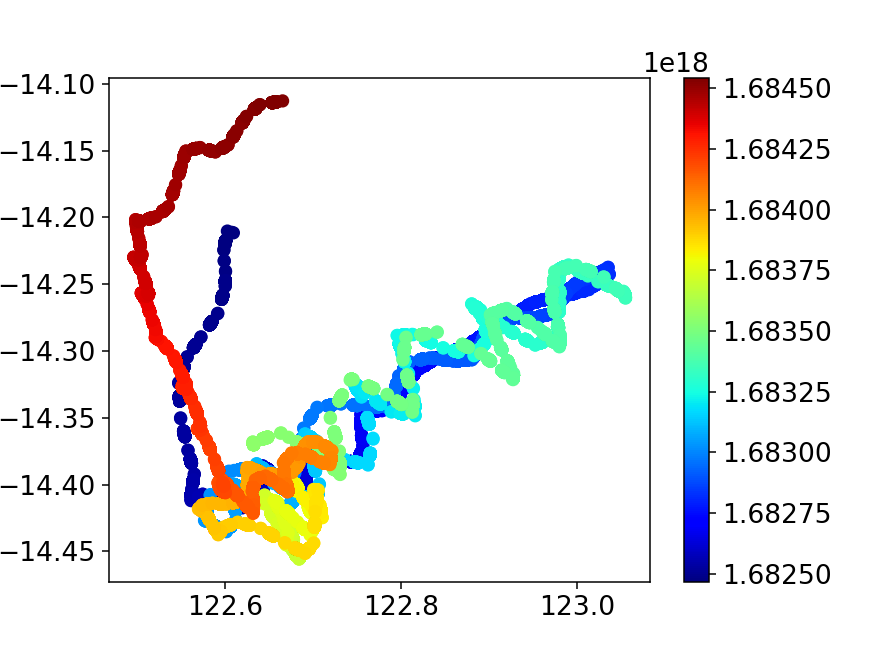

In [42]:
plt.figure()
plt.scatter(myds['LONGITUDE'],myds['LATITUDE'],c=myds['TIME'],
           cmap='jet',
           )
plt.colorbar()

<IPython.core.display.Javascript object>


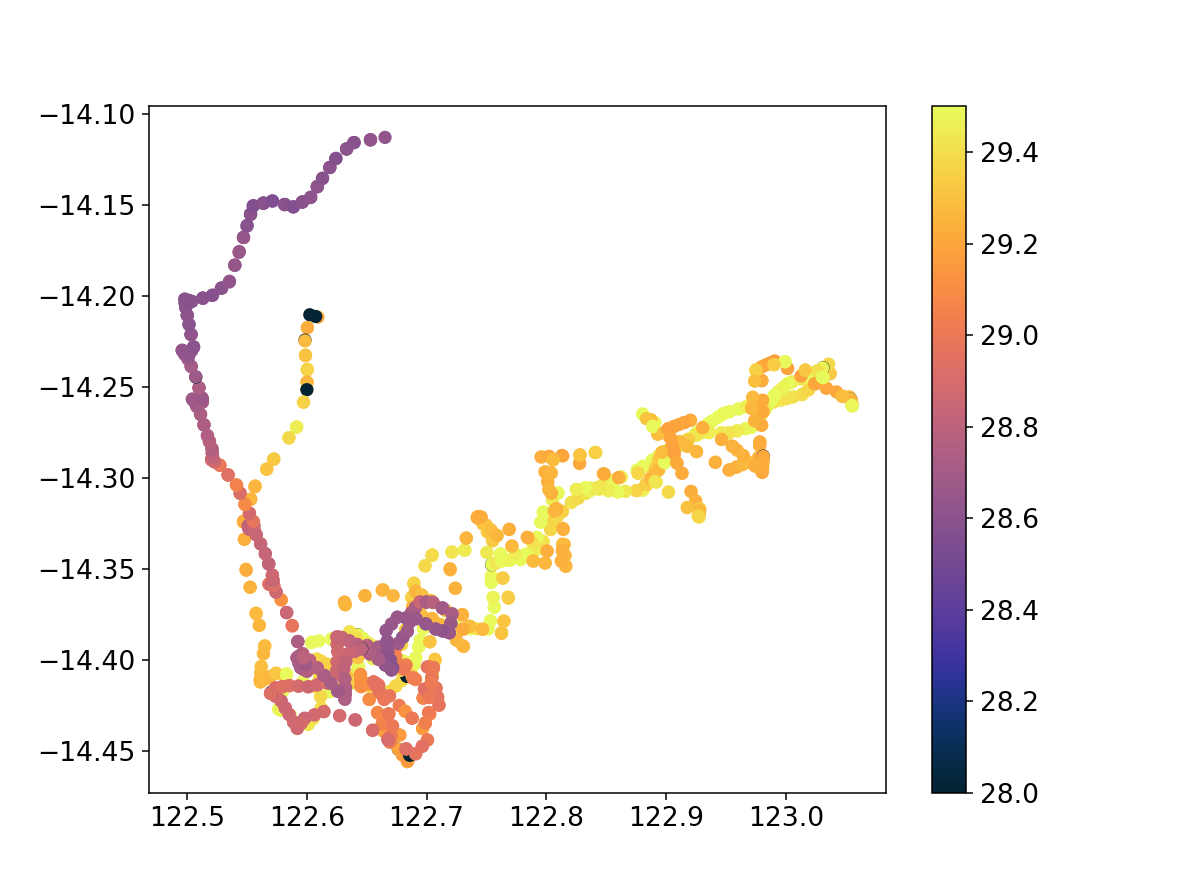

In [43]:
plt.figure()
plt.scatter(myds['LONGITUDE'],myds['LATITUDE'],c=myds['TEMP'],
           cmap=cm.cm.thermal,
           vmin=28.0, vmax=29.5)
plt.colorbar()

<IPython.core.display.Javascript object>


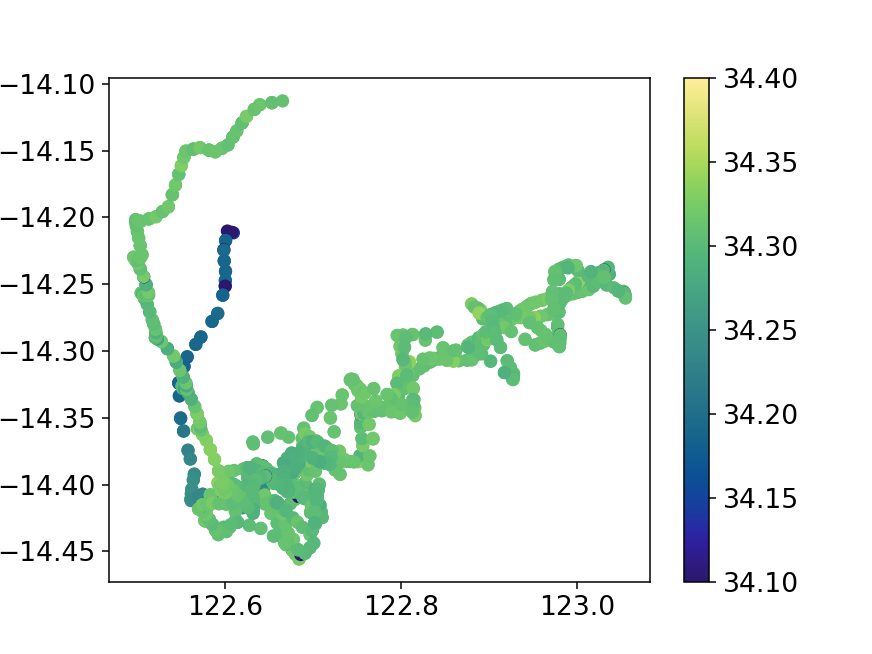

In [44]:
plt.figure()
plt.scatter(myds['LONGITUDE'],myds['LATITUDE'],c=myds['PSAL'],
           cmap=cm.cm.haline,
           vmin=34.1, vmax=34.4)
plt.colorbar()

<IPython.core.display.Javascript object>


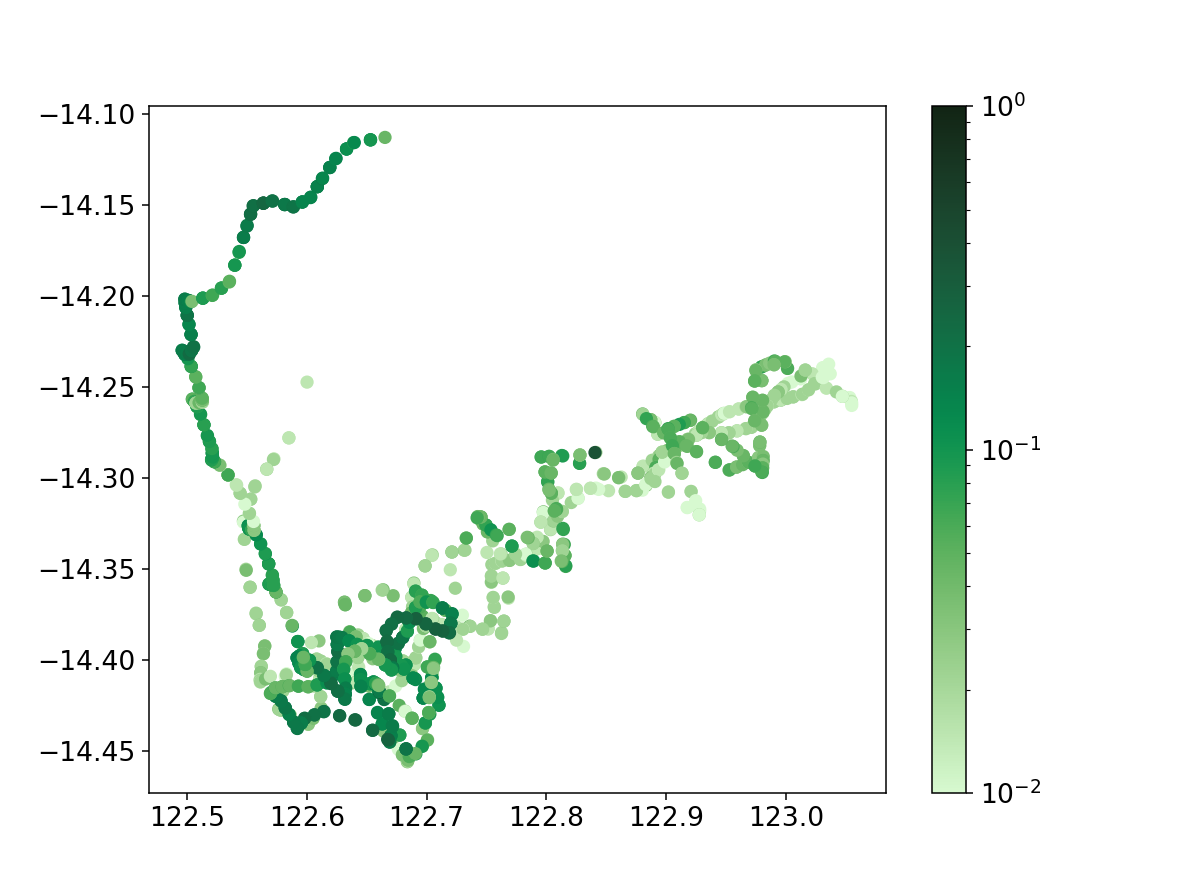

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  


In [45]:
from matplotlib.colors import LogNorm
plt.figure()
plt.scatter(myds['LONGITUDE'],myds['LATITUDE'],c=myds['CPHL'],
           cmap=cm.cm.algae,
           vmin=1e-2, vmax=1,
           norm=LogNorm())
plt.colorbar()